# Investigate SF Bay Ford GoBike Dataset
<span style="font-family:Arial; font-size:1.3em;">By: Redi Sunarta - Udacity Student (2020)</span>

## Investigation Overview

In this project, I choose the [**Ford GoBike Dataset**](https://www.lyft.com/bikes/bay-wheels/system-data). This data set contains information about million bicycles trip bicycles.  it makes me interested to understand how behavior of SF citizens' cycling  by `duration_sec` column. I divide the questions into two categories, about bicycle distribution and citizen's time use a bicycle.
1. It is important to properly design the bicycle distribution, is bicycle distribution efficient? is there a bicycle that is used more often than others, in term of duration or count? whether the bicycle is only at a particular station?
2. How SF Bay Citizen bicycle behave in each time aggregation? Higher duration bike equal to higher distance? What difference Subscriber and Customer bicycle duration?

## Dataset Overview
After, little bit cleaning process, my dataset have **2.506.884** rows and **13** columns. The data give me duration of trip; where/when station start and end the trip, thus the latitude-longitude give me the distance; third one, what bike id use in the trip. Even though, in last updated, the dataset only give me one information about the customer which is he/she the subcriber or not. They exclude the gender and birt year of subsciber data which exist last year dataset. I know this because see the Udacity student project in github. Therefore, the column will be support my investigation considerly limited, so I'll do some data engineering.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the cleaned dataset into a pandas dataframe
data = pd.read_csv("baywheels-tripdata2019.csv")
data.head()

,Unnamed: 0,duration_sec,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,bike_share_for_all_trip,month,day_name,hour,date,distance
0,0,80825,229.0,Foothill Blvd at 42nd Ave,196.0,Grand Ave at Perkins St,4861,Subscriber,No,January,Thursday,17,31,5.301868
1,1,65900,4.0,Cyril Magnin St at Ellis St,134.0,Valencia St at 24th St,5506,Subscriber,No,January,Thursday,20,31,3.857205
2,2,62633,245.0,Downtown Berkeley BART,157.0,65th St at Hollis St,2717,Customer,No,January,Thursday,18,31,3.285035
3,3,44680,85.0,Church St at Duboce Ave,53.0,Grove St at Divisadero,4557,Customer,No,January,Thursday,19,31,0.999005
4,4,60709,16.0,Steuart St at Market St,28.0,The Embarcadero at Bryant St,2100,Customer,No,January,Thursday,14,31,0.952756


> The first reviewer suggest me to create datetime column, however the main problem is this notebook code based on my cleaned dataset whose I didn't save and provide. Although, I was making datetime aggregation in hourly, day, nor monthly. Therefore, I corrected the submission with the explicit statement storing cleaned dataset and I provide/upload the cleaned dataset.

## Bicycle Trip Duration
* Bicycle user GoBike just for **short trip** 
        --In average they riding a bicycle for only ~13.3 minutes each trip. 
* Bicycle distribution slighly normal distributed. 
        --It's could **be sign that efeciency of bike distribution**

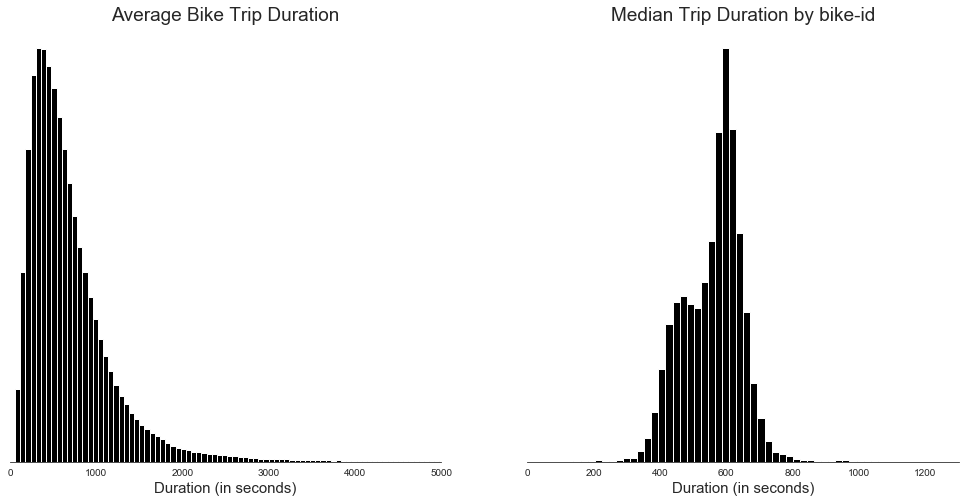

In [3]:
#the trip duration Plot 
sns.set_style("white")
plt.figure(figsize=(17, 8))

bin_edges = np.arange(0, data['duration_sec'].max() + 100 , 60)

plt.subplot(1,2,1)
plt.hist(data = data , x = 'duration_sec' , bins = bin_edges, color="black")
plt.xlim(0,5000)
plt.title('Average Bike Trip Duration', size=19)
plt.xlabel('Duration (in seconds)', size=15)
sns.despine(left=True)
plt.yticks([])

plt.subplot(1,2,2)
bike = data.groupby("bike_id", as_index=False)["duration_sec"].median().sort_values("duration_sec")
bike.rename(columns={"duration_sec":"median_count"}, inplace=True)

plt.hist(bike["median_count"], color="black", bins=150)
plt.xlim(0,1300)
plt.title('Median Trip Duration by bike-id', size=19)
plt.xlabel('Duration (in seconds)', size=15)
plt.yticks([])
sns.despine(left=True);

## Total Bicycle Trips in 2019
* **The trip dominated by rushing hour** in morning and afternoon. 
        -- Even though, this trend is slightly seen in monthly aggregation, but in summer or winter holidays appear to be less frequent trips than other months.

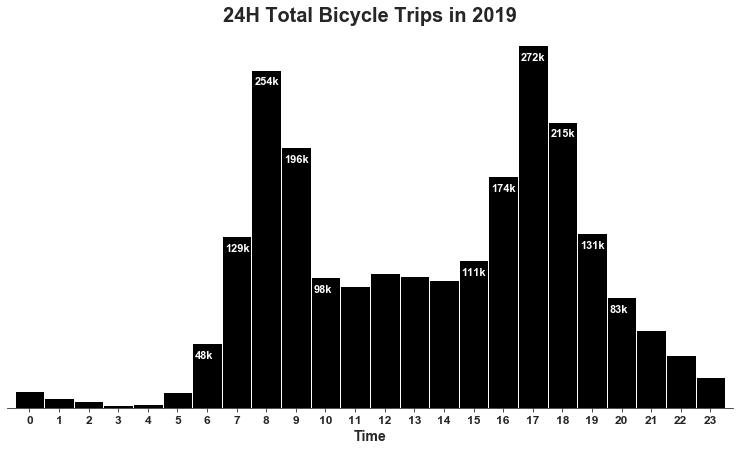

In [4]:
s = data.groupby("hour")["duration_sec"].count()

sns.set_style("ticks", {"xtick.mayor.size":0, "ytick.mayor.size":8})
plt.figure(figsize=(13, 7))

s.plot(kind="bar", rot=0, color="black", width=1)
plt.title("24H Total Bicycle Trips in 2019", size=20, fontweight="bold")
for i,v in enumerate(s):
    if i in [6, 7,8,9,10, 15, 16,17,18,19, 20]:
        plt.text(i-0.4, v-11000, f"{round(v/1000)}k", fontsize=11, 
                 color="white", fontweight="bold")
plt.xlabel("Time", size=14, fontweight="bold")
plt.xticks(size=12, fontweight="bold")
sns.despine(left=True)
plt.yticks([]);

## Weekend vs Weekday
* The trips largely used for going to work or returning from work.
* Non-member user less right skew than subscriber user type

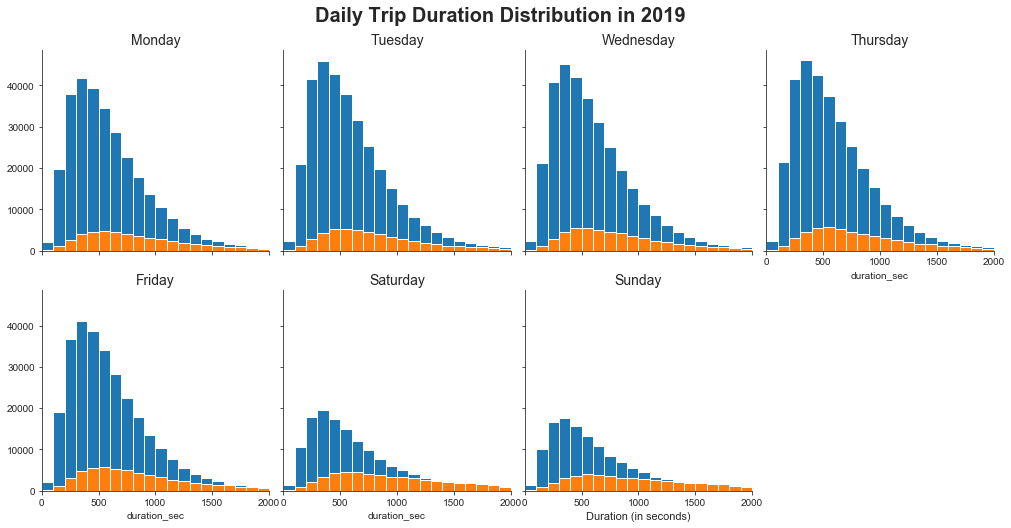

In [5]:
bin_edges = np.arange(0, data['duration_sec'].max() + 1 , 100)
g = sns.FacetGrid(data, col="day_name", col_order=["Monday", "Tuesday", "Wednesday", "Thursday", 
                                                   "Friday", "Saturday", "Sunday"], 
                  col_wrap=4, height=3.5, hue="user_type", hue_order=["Subscriber", "Customer"])
g.map(plt.hist, "duration_sec", bins=bin_edges)
plt.suptitle("Daily Trip Duration Distribution in 2019", y = 1.04, size=20, fontweight="bold")
g.set_titles('{col_name}', size=14)
plt.xlim(0,2000)
plt.xlabel('Duration (in seconds)', size=11);